In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Week 8 assigmnent
In this week 8 assigment we study the stability of the excitatory-inhibitory two neuron systems.<br>
In this system we can use equations similar to the $\textit{Lotka-Volterra}$ model to describe the interaction between an excitatory and an hinibitory neuron. <br>
We see a sketch of the model in the image below.


<center>
<img src = "EI_model.png" alt = "Model sketch" style = "width: 400px">
</center>

The neurons outputs are $T \to v_E$ and $I \to v_I$, with the weights being,

$$
\begin{pmatrix} 
	M_{EE} & M_{EI} \\
	M_{IE} & M_{II} \\
\end{pmatrix}
$$

The dynamics is described by,

$$
\begin{cases}
\tau_E \dfrac{dv_E}{dt} \quad = \quad -v_E + \psi \left (  h_E + M_{EE}v_E + M_{EI}v_I  \right )\\
\\
\tau_I \dfrac{dv_I}{dt} \quad = \quad -v_I + \psi(h_I + M_{IE}v_E + M_{II}v_I)
\end{cases}
$$

where $h_I$ and $h_E$ are external stimuli. As activation function we can consider a $ReLU, \psi(x) := max(0, x)$.<br>

For the moment let's see what happens when the argument of the $ReLU$ is positive in both cases $(v_E > 10 \text{ and } v_I < 10 + 1.25 \cdot v_E)$.

In this case we consider as numerical values $M_{EE} = 1.25, M_{IE} = 1, M_{EI} = -1, M_{II} = 0, h_E = 10Hz, h_I=-10Hz, \tau_E = 10 ms$.<br>
And we study the dynamics changing $\tau_I$

<br/>

We study the stability of the fixed point $\vec{v^*}$ by computing the Jacobian $J$, that yells

$$
J |_{\vec{v^*}} = 
\begin{pmatrix} 
	-\dfrac{(1 - M_{EE})}{\tau_E} & \dfrac{M_{EI}}{\tau_E} \\
	\\&\\
	\dfrac{M_{IE}}{\tau_I} & -\dfrac{1-M_{II}}{\tau_I} \\
\end{pmatrix}
$$

With the fixed points, $\dfrac{dv_E}{dt} = 0 \quad$ and $\quad \dfrac{dv_I}{dt} = 0$ can be found using vector formalism,

$$
\begin{pmatrix}
(1 - M_{EE}) & -M_{EI} \\
\\
-M_{IE} & (1 - M_{II})	
\end{pmatrix}
\begin{pmatrix}
v^*_E \\
v^*_I
\end{pmatrix}
=
\begin{pmatrix}
h_E \\
h_I
\end{pmatrix}
$$

Left multiplying by the inverse of the matrix we obtain,

$$
\begin{pmatrix}
v^*_E \\
v^*_I
\end{pmatrix}
=
\dfrac{1}{(1 - M_{EE})(1 - M_{II}) - M_{EI}M_{IE}}
\begin{pmatrix}
(1 - M_{II}) &  M_{EI} \\
\\
M_{IE} & (1 - M_{EE})
\end{pmatrix}
\begin{pmatrix}
h_E \\
h_I
\end{pmatrix}
$$

<br/>

Substituting the numerical values we obtain, 

$$
\begin{pmatrix}
v^*_E \\
v^*_I
\end{pmatrix}
\approx
\begin{pmatrix}
26.67 \\
16.67
\end{pmatrix}
$$

<br/>

Let's show that the latter is the only fixed point of the system by treating also the cases where the argument of the $ReLU$ is negative. <br>
In the differential equation for $v_I$ we have that the argument of the $ReLU$ is negative if $v_E \lt 10$, in this case we have $v^*_I = 0$ and, <br>

$$
- v^*_E + \psi(10 + 1.25 v^*_E) = 0; \quad 0.25 v^*_E = -10
$$

Thus we have no physical fixed point. <br>

If instead the argument of the $ReLU$ is negative in the $ODE$ for $v_E$ we have $v^*_E = 0$ and,

$$
-v^*_I + \psi(-10) = 0; \rightarrow v^*_I = 0
$$

But this would mean that the argument of the $Relu$ in the first $ODE$ is $\psi(10)$, contradicting our assumption. <br>

<br/>

From now on we will then consider only the case where the argument of the $ReLU$ is positive in both equations.

By writing the characteristic polynomial of the Jacobian we can find the eigenvalues of the system, and thus the stability of the fixed point. Computing the characteristic polynomial we obtain,

<br/>

$$
\begin{pmatrix} 
	-\dfrac{(1 - M_{EE})}{\tau_E} - \lambda \mathbb{I}& \dfrac{M_{EI}}{\tau_E} \\
	\\&\\
	\dfrac{M_{IE}}{\tau_I} & -\dfrac{1-M_{II}}{\tau_I} - \lambda \mathbb{I} \\
\end{pmatrix}
$$

As far as the polynomial we have,

$$
\left ( \dfrac{1 - M_{EE}}{\tau_E} + \lambda \right ) \cdot \left (  \dfrac{1 - M_{II}}{\tau_I} + \lambda \right ) - \dfrac{M_{EI}M_{IE}}{\tau_I\tau_E} \quad = 
$$

<br/>

$$
\quad = \quad \lambda^2 + \lambda \cdot \left (  \dfrac{(1 - M_{EE})}{\tau_E} + \dfrac{(1 - M_{II})}{\tau_I} \right)  + \dfrac{(1 - M_{EE})(1 - M_{II})}{\tau_E \tau_I} - \dfrac{M_{EI}M_{IE}}{\tau_I\tau_E} \quad
$$
Solving the second order equation we get,
$$
\lambda_{\pm} \quad = \quad \dfrac{(M_{EE} - 1)}{\tau_E} + \dfrac{(M_{II} - 1)}{\tau_I} \pm \sqrt{\left (  \dfrac{(1 - M_{EE})}{\tau_E} + \dfrac{(1 - M_{II})}{\tau_I} \right )^2 + 4\dfrac{M_{EI}M_{IE}}{\tau_I\tau_E} - 4\dfrac{(1 - M_{EE})(1 - M_{II})}{\tau_E \tau_I}}
$$

We wanna verify the nature of the fixed point, so we study when the argument of the square root is positive. Substituting the numerical values,

$$
\left (  -0.025 + \dfrac{1}{\tau_1}  \right )^2 - \dfrac{0.4}{\tau_1} + \dfrac{0.4 \cdot 0.25}{\tau_I} \gt 0;
$$

$$
-0.025 + \dfrac{1}{\tau_I} \gt \sqrt{\dfrac{0.4 \cdot 0.75}{\tau_I}},
$$
Making the substitution $\sqrt{(\tau_I)} = t$ we obtain,

$$
0.025 t^2 - 1 + t \sqrt{0.4 \cdot 0.75} \lt 0
$$

The above is satisfied inside the $2$ endpoints $t_{\pm}$ given by the condition,

$$
t_{\pm} \quad = \quad \dfrac{-\sqrt{0.4 \cdot 0.75} \pm \sqrt{0.4 \cdot 0.75 + 4 \cdot 0.025}}{2 \cdot 0.025}
$$

That are $t_+ \approx 1.69$ and $t_- \approx -25.2$
Considering only the physical values and remembering that $\tau_I = t^2$ we have that our eigenvalues will be complex coniugate if $\tau_I \gtrapprox 2.87$ and real otherwise.

<br/>

Let's verify it numerically

In [2]:
M_ee = 1.25; M_ie = 1; M_ei = -1; M_ii = 0; h_e = 10; h_i = -10; tau_e = 10
Jacobian = np.array([[(- (1 - M_ee)/tau_e), M_ei/tau_e ], # Defining the jacobian with tau_i = 1
                    [M_ie / 1, -(1 - M_ii) / 1]])

tau_I = np.linspace(0.1, 20, 1000)

# Defining the matrix that multiplied by the Jacobian with tau_I = 1 gives the Jacobian with the right tau_I
tau_matrix = [np.array([[1, 1], 
                        [1/tau, 1/tau]]) * Jacobian for tau in tau_I]

In [3]:
inverse = np.linalg.inv(np.array([[1-M_ee, -M_ei],
                [-M_ie,1-M_ii]]))
fixed_point = inverse.dot(np.array([10, -10]))
print('The fixed point is', fixed_point)

The fixed point is [26.66666667 16.66666667]


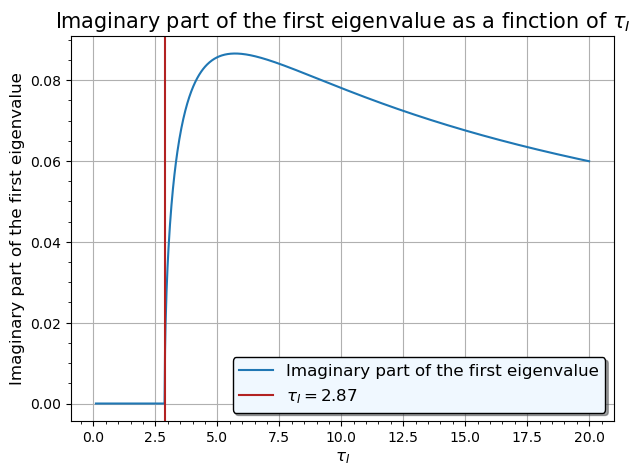

In [4]:
threshold  = 2.87
# Computing the imaginary part of the eigenvalues of the first eienvalue
imag_part = list(map(lambda x: np.linalg.eigvals(x)[0].imag, tau_matrix)) 

# Plotting the imaginary part of the first eigenvalue

fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(tau_I, imag_part, zorder = 2, label = 'Imaginary part of the first eigenvalue')
ax.grid(zorder = 1)
ax.minorticks_on()
ax.legend(shadow = True, fontsize = 12, facecolor = 'aliceblue', edgecolor = 'black')
ax.set_title('Imaginary part of the first eigenvalue as a finction of $\\tau_I$', fontsize = 15)
ax.set_xlabel('$\\tau_I$', fontsize = 12)
ax.set_ylabel('Imaginary part of the first eigenvalue', fontsize = 12)
ax.axvline(threshold, color = 'firebrick', label = f'$\\tau_I = {threshold}$')
ax.legend(shadow = True, fontsize = 12, facecolor = 'aliceblue', edgecolor = 'black')

plt.show()

We can see that the imaginary part is different from $0$ only above $\tau_I \approx 2.87$

### Complex conjugate case
We study here the case of $\tau_I \gt 2.87$ where the eigenvalues are complex conjugate. 
We have $3$ possibilities here:

- $\mathcal{Re}(\lambda) > 0$: in this occasion the fixed point is unstable and we have a spiral, so the system, before merging into a periodic solution, will diverge as a spiral.

- $\mathcal{Re}(\lambda) < 0$: The solution is a spiral converging toward the fixed point.

- $\mathcal{Re}(\lambda) = 0$: The fixed point is a center and the solutions will be periodic.

We should make an important note though, when $\mathcal{Re}(\lambda) = 0$ the *Hartman-Grobman* theorem does not hold (the fixed point is not hyperbolic) and we are not sure the linearization is topologically equivalent to the full solution. Let's check all of this numerically.

First of all we have that $\mathcal{Re}(\lambda) = 0$ happens if,

$$
\dfrac{(M_{EE} - 1)}{\tau_E} + \dfrac{(M_{II} - 1)}{\tau_I} \quad = \quad 0;
$$
$$
\dfrac{1}{\tau_I} = \dfrac{1}{4 \cdot 10}; \quad \tau_I = 40
$$

Let's see the the simulation of the full solution in the $3$ cases $\quad 2.51 < \tau_I < 40$, $\quad \tau_I = 40$, $\quad \tau_I > 40$. In the first one we should obtain a spiral converging to the fixed point, in the second one we should obtain a periodic solution and in the last one we should obtain a spiral diverging from the fixed point.


In [5]:
def ReLU(x):
    return x * (x > 0)

v_e_0 = 20
v_i_0 = 20

def system(s, t, M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, tau_i):
    v_e, v_i = s
       
    dv_e_dt = (1/tau_e) * (-v_e + ReLU(h_e + M_ee * v_e + M_ei * v_i ) )               
    dv_i_dt = (1/tau_i) * (-v_i + ReLU(h_i + M_ie * v_e + M_ii * v_i ) )              
    
    return [dv_e_dt, dv_i_dt]

t = np.linspace(0, 1000, 1000)   # time_domain

s0 = [v_e_0, v_i_0]   # initial conditions

tau_i = [20, 40, 60]
solutions = []
for tau in tau_i:
    solution = odeint(system, s0, t, args=(M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, tau))
    solutions.append(solution)

In [6]:
X, Y = np.meshgrid(np.linspace(0, 80, 20), np.linspace(0, 80, 20))
U, V = system([X, Y], '', M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, tau_i[0])

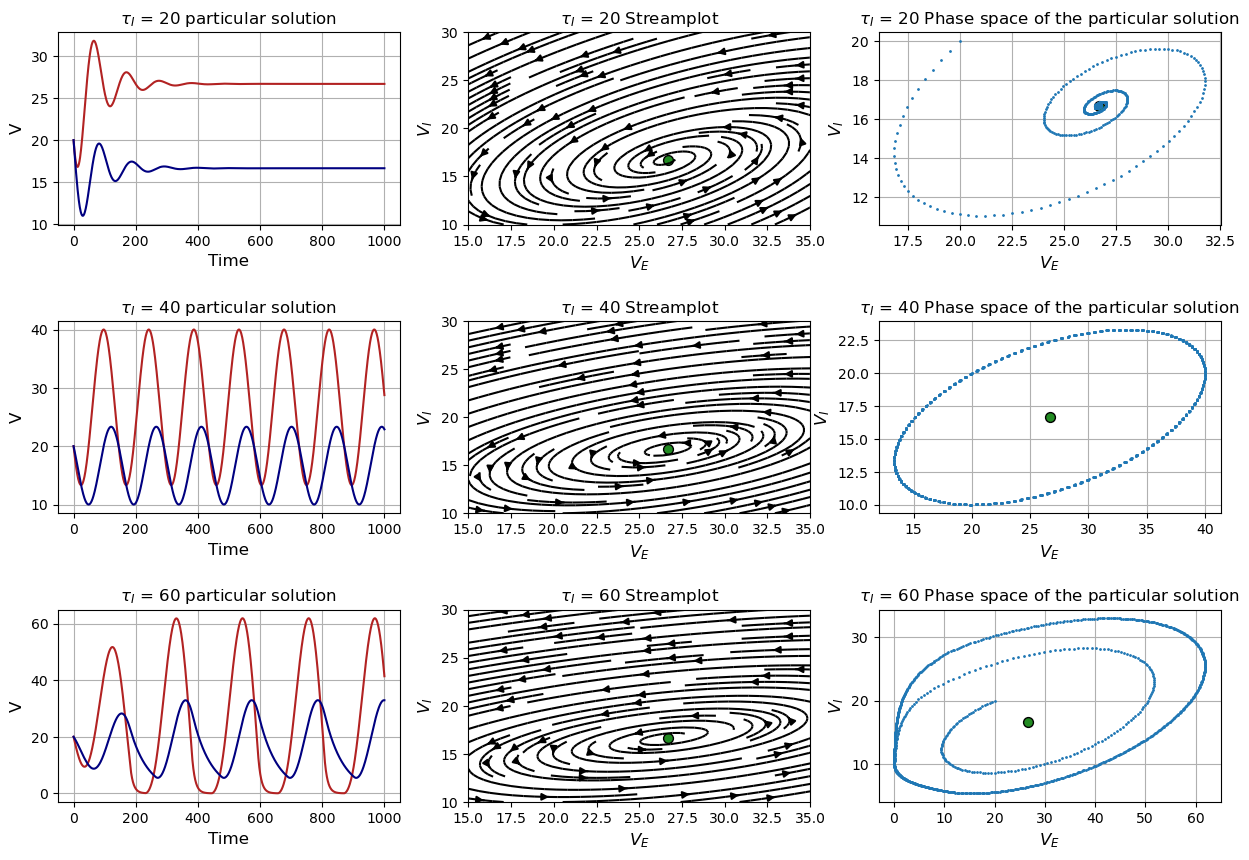

In [7]:
fig, ax_ = plt.subplots(3, 3, figsize = (15, 10))
ax = ax_.flatten()
for i in range(3):
    X, Y = np.meshgrid(np.linspace(15, 35, 200), np.linspace(10, 30, 200))
    U, V = system([X, Y], '', M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, tau_i[i])

    ax[3 * i].plot(t, solutions[i][:, 0], color = 'firebrick', zorder = 2)
    ax[3 * i].plot(t, solutions[i][:, 1], color = 'navy', zorder = 2)
    ax[3 * i].set_xlabel('Time', fontsize = 12)
    ax[3 * i].set_ylabel('V', fontsize = 12)
    ax[3 * i].grid(zorder = 1)
    ax[3 * i].set_title('$\\tau_I$ = ' + str(tau_i[i]) + ' particular solution')
    ax[3 * i + 1].set_title('$\\tau_I$ = ' + str(tau_i[i]) + ' Streamplot')
    ax[3 * i + 1].scatter(fixed_point[0], fixed_point[1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
    ax[3 * i + 2].scatter(fixed_point[0], fixed_point[1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')    
    ax[3 * i + 1].streamplot(X, Y, U, V, density = 1, color = 'black')
    ax[3 * i + 1].set_xlabel('$V_E$', fontsize = 12)
    ax[3 * i + 1].set_ylabel('$V_I$', fontsize = 12)
    ax[3 * i + 2].scatter(solutions[i][:, 0], solutions[i][:, 1], color = 'C0', label = 'Initial conditions', s=1,\
        zorder = 2)
    ax[3 * i + 2].set_title('$\\tau_I$ = ' + str(tau_i[i]) + ' Phase space of the particular solution')
    ax[3 * i + 2].grid(zorder = 1)
    ax[3 * i + 2].set_xlabel('$V_E$', fontsize = 12)
    ax[3 * i + 2].set_ylabel('$V_I$', fontsize = 12)
#ax.plot(t, solutions[0][:, 0])
#ax.plot(t, solutions[0][:, 1])

#ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

We see that we obtain what we expected and, also for the case of the center solution, where we were not sure about the validity of the linearization, we see that the linearization is topologically equivalent to the full solution.

## $\tau_I \lessapprox 2.8$ case
In the case $\tau_I \lessapprox 2.8$ case, as we saw above, the eigenvalues are both real, we have thus to study the sign of the eigenvalues to establish the nature of the fixed point. <br>
Substituting the numerical values we check when they are positive,

$$
0.025 - \dfrac{1}{\tau_I} \pm \sqrt{\left (  -0.025 + \dfrac{1}{\tau_I} \right )^2 - \dfrac{0.4}{\tau_I} + \dfrac{0.4 \cdot 0.25}{\tau_I}} \gt 0
$$

Bringing the square root to the left and taking the square of both terms we have that the $\pm$ becomes irrelevant and we can write, 

$$
\cancel{\left ( 0.025 - \dfrac{1}{\tau_I}  \right )^2} \gt \cancel{\left ( 0.025 - \dfrac{1}{\tau_I}  \right )^2} - 0.4 \cdot \dfrac{1}{\tau_I} + 0.4 \cdot 0.25 \cdot \dfrac{1}{\tau_I}
$$

So we should satisy,

$$
0 \gt - 0.4\cdot \dfrac{1}{\tau_I} + 0.4 \cdot 0.25 \cdot \dfrac{1}{\tau_I}; \quad -0.75 \cdot \dfrac{1}{\tau_I} > 0
$$

That is never verifyed, so we have that the eigenvalues are always negative and the fixed point is stable.<br>

In the general case we have that the $2$ eigenvalues are distinct and we have a stable node. If instead the argument of the square root is $0$ (and we have seen this happen if $\tau_I \approx 2.87$), we will have a degenerate node. 

Let's see all of this numerically.

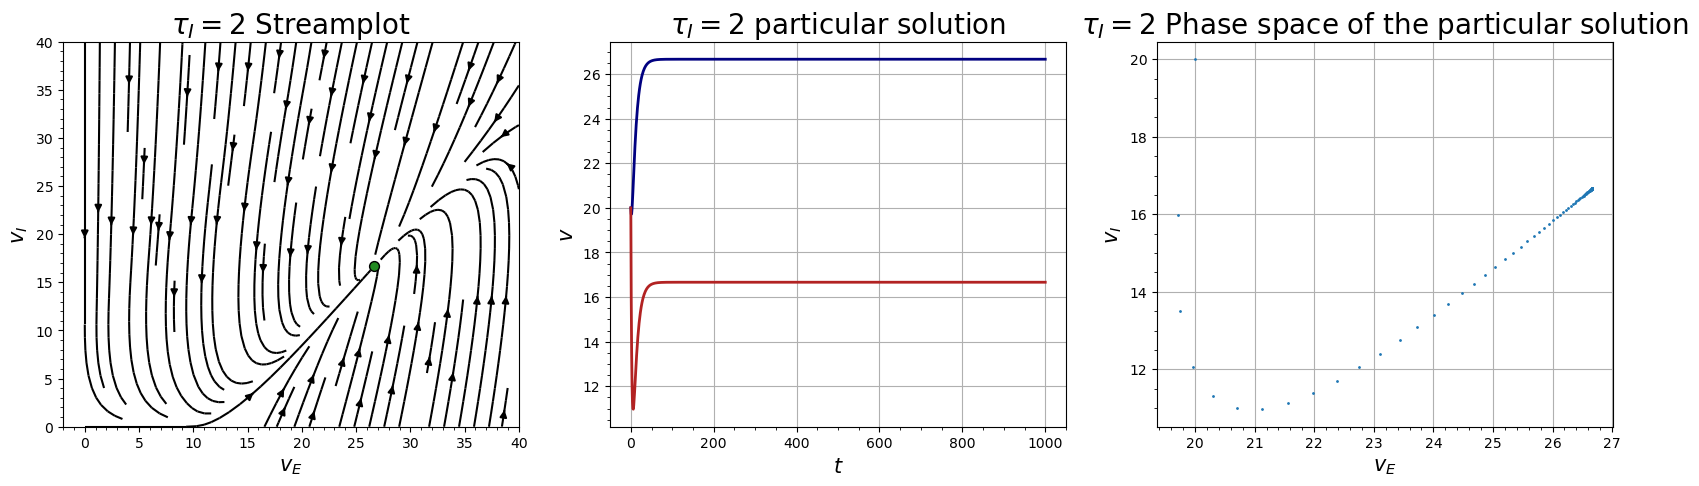

In [8]:
X, Y = np.meshgrid(np.linspace(0, 40, 200), np.linspace(0, 40, 200))
U, V = system([X, Y], '', M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, 2)
solution = odeint(system, s0, t, args=(M_ee, M_ei, M_ie, M_ii, h_e, h_i, tau_e, 2))

fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax1, ax2, ax3 = ax.flatten()
ax1.streamplot(X, Y, U, V, density = 1, color = 'black')
ax1.scatter(fixed_point[0], fixed_point[1], color = 'forestgreen', label = 'Fixed point', zorder = 2, \
        s= 50, edgecolor = 'black')
ax1.set_title('$\\tau_I = 2$ Streamplot', fontsize = 20)
ax1.set_xlabel('$v_E$', fontsize = 15)
ax1.set_ylabel('$v_I$', fontsize = 15)
ax2.plot(t, solution[:, 0], zorder = 2, color = 'navy', linewidth = 2, label = '$v_E$')
ax2.plot(t, solution[:, 1], zorder = 2, color = 'firebrick', linewidth = 2,\
           label = '$v_I$')
ax2.set_title('$\\tau_I = 2$ particular solution', fontsize = 20)
ax2.grid(zorder = 1)
ax2.set_xlabel('$t$', fontsize = 15)
ax2.set_ylabel('$v$', fontsize = 15)
ax3.scatter(solution[:, 0], solution[:, 1], color = 'C0', s=1,\
        zorder = 2)
ax3.set_title('$\\tau_I = 2$ Phase space of the particular solution', fontsize = 20)
ax3.grid(zorder = 1)
ax3.set_xlabel('$v_E$', fontsize = 15)
ax3.set_ylabel('$v_I$', fontsize = 15)
for ax_ in ax.flatten():
    ax_.minorticks_on()
plt.show()
#ax[0].plot(np.linspace(0, 40, 40)*np.linalg.eig(tmp)[1][:, 0][1] +  np.linalg.eig(tmp)[1][:, 0][0])

We  see as we expected that we do not have a spiral anymore and now the fixed point is stable, compatible with the fact that the eigenvalues are negative.


Finally let's vusualize the nature of the fixed point as $\tau_I$ varies.

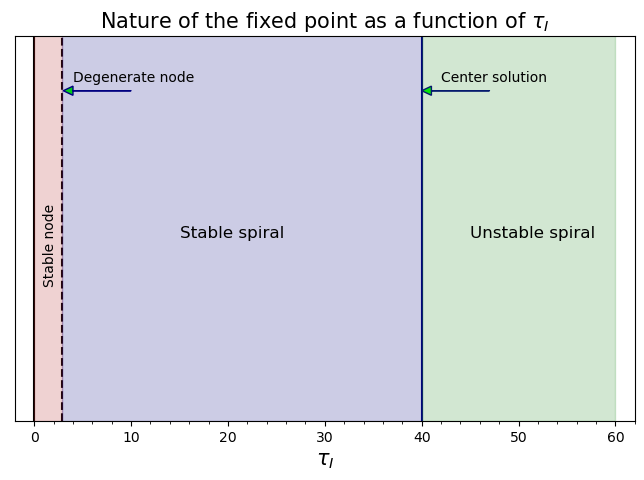

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

ax.axvline(0, color = 'black', zorder = 1)
ax.axvline(threshold, color = 'black', zorder = 1, linestyle = '--')
ax.axvline(40, color = 'navy', zorder = 1, label = 'Center solution')

ax.set_xlim(-2, 62)
ax.set_ylim(top = 42)

ax.fill_betweenx(np.linspace(0, 50, 100), 0, threshold, color = 'firebrick', alpha = 0.2, zorder = 2,\
    label = 'Stable fixed point')
ax.fill_betweenx(np.linspace(0, 50, 100), threshold, 40, color = 'navy', alpha = 0.2, zorder = 2,\
    label = 'Stable spiral')
ax.fill_betweenx(np.linspace(0, 50, 100), 40, 60, color = 'forestgreen', alpha = 0.2, zorder = 2,\
    label = 'Unstable spiral')

#ax.legend(fontsize = 10, facecolor = 'aliceblue', shadow = True, edgecolor = 'black')
ax.set_xlabel('$\\tau_I$', fontsize = 15)
ax.set_title('Nature of the fixed point as a function of $\\tau_I$', fontsize = 15)
ax.text(0.9, 15, 'Stable node', fontsize = 10, rotation = 90)
ax.text(15, 20, 'Stable spiral', fontsize = 12)
ax.text(45, 20, 'Unstable spiral', fontsize = 12)
ax.arrow(10, 36, -6, 0, head_width=1, head_length=1, fc='lime', ec='navy')
ax.arrow(47, 36, -6, 0, head_width=1, head_length=1, fc='lime', ec='navy')
ax.text(4, 37, 'Degenerate node', fontsize = 10)
ax.text(42, 37, 'Center solution', fontsize = 10)
#ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.minorticks_on()
